# This is **Two-ray-ground** model
> Without shadowing and fading  
> Downlink (BS to MS)

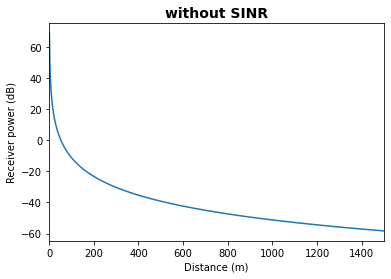

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# constant
h_BS = 1.5+50 # 基站高度 (m), on the top of the 50m high building
h_MS = 1.5  # 手機高度 (m)
P_BS = 10 ** 0.3 ##W
G_TX= 10 ** 1.4 ##W
G_RX= 10 ** 1.4 ##W

# P_BS = 33 - 30 # dBm to dB scale
# G_TX = 14  # 基站天線增益 (dBi)
# G_RX = 14  # 手機天線增益 (dBi)

def to_dB(x):
    return 10 * np.log10(x)

def path_loss(d): #g(d) in the book
    return ((h_BS*h_MS)**2) / d**4

def receiver_power(d): #not considering the shadowing and fading
    gd = path_loss(d)
    Pr = gd * P_BS * G_TX * G_RX
    Pr = 10 * np.log10(Pr)

    # Pr = P_BS + G_TX + G_RX + gd
    # gd = to_dB(gd)
    return Pr

# 產生 1m 到 1000m 之間的距離
d = np.arange(1, 1501)

# 計算每個距離的接收功率
Pr = receiver_power(d)

# 繪製接收功率 vs. 距離圖
plt.plot(d, Pr)
plt.title('without SINR', fontsize = 14, fontweight='bold')
plt.xlabel('Distance (m)')
plt.ylabel('Receiver power (dB)')
plt.xlim(0,1500)
plt.show()

#This is for **SINR**
> Signal-to-interference-plus-noise ratio

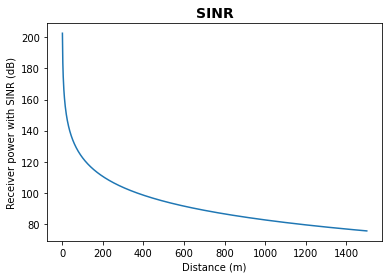

In [12]:
temp = 27 + 273.15 # turn to Kelvin
k = 1.38e-23 # Boltzman's constant
B = 10e6  # 頻寬 (Hz)

thermal_noise = k * temp * B
interference = 0 

SINR = thermal_noise + interference

def SINR_receiver_power(d): #not considering the shadowing and fading
    gd = path_loss(d)
    Pr = gd * P_BS * G_TX * G_RX
    Pr /= SINR

    Pr = 10 * np.log10(Pr)
    return Pr

Pr_new = SINR_receiver_power(d)

plt.plot(d, Pr_new)
plt.title('SINR',fontsize = 14, fontweight='bold')
plt.xlabel('Distance (m)')
plt.ylabel('Receiver power with SINR (dB)')
plt.xlim(0,1500)
plt.show()

#This is the model considering the **path loss** and **shadowing**
> Apply **log-normal shadowing**  
> The path model is the same as 1-1

[1.50837666 0.4222036  1.67749742 ... 0.07599232 0.27275738 1.01846424]


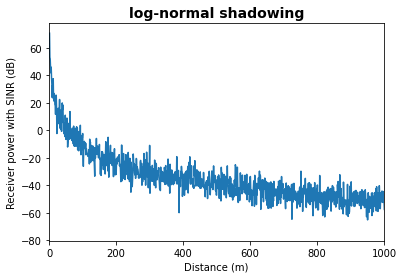

In [28]:
sigma = 6 #dB

def to(x):
  return 10 ** (x/10)

def shadowing(d):
    gd = path_loss(d)
    x = np.random.normal(0, sigma, len(d)) # mean=0
    shadow = 10 ** (x/10)
    print(shadow)
    Pr = gd * P_BS * G_TX * G_RX * shadow

    Pr = 10 * np.log10(Pr)
    return Pr

Pr_new = shadowing(d)

plt.plot(d, Pr_new)
plt.title('log-normal shadowing', fontsize = 14, fontweight='bold')
plt.xlabel('Distance (m)')
plt.ylabel('Receiver power with SINR (dB)')
plt.xlim(0,1500)
plt.show()

#This is for **SINR** added in the consideration

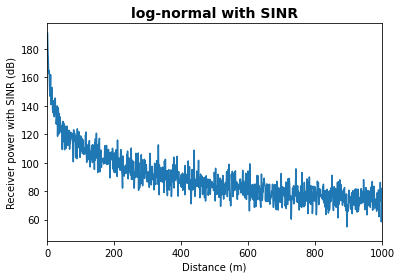

In [27]:
def shadowing_SINR(d): #not considering the shadowing and fading
    gd = path_loss(d)
    x = np.random.normal(0, sigma, len(d)) # mean=0
    shadow = 10 ** (x/10)
    Pr = gd * P_BS * G_TX * G_RX * shadow
    
    Pr /= SINR
    Pr = 10 * np.log10(Pr/10)
    return Pr

Pr_new = shadowing_SINR(d)

plt.plot(d, Pr_new)

plt.title('log-normal with SINR',fontsize = 14, fontweight='bold')
plt.xlabel('Distance (m)')
plt.ylabel('Receiver power with SINR (dB)')
plt.xlim(0,1500)
plt.show()

#This is to verify that the **probability** distribution

In [ ]:
Pr_1 = shadowing(d)
Pr_2 = shadowing(d)

# 繪製圖形
plt.plot(d, Pr_1, label='1st')
plt.plot(d, Pr_2, label='2nd')

# 設置標籤和標題
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of y1 and y2')

# 設置圖例
plt.legend()

# 顯示圖形
plt.show()

